# Cleaning & EDA of dataframe

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np


def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.

        taken from Guillaume Martin, https://www.kaggle.com/code/gemartin/load-data-reduce-memory-usage
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:4] == 'bool':
              continue
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

df = pd.read_csv('/content/drive/MyDrive/ISIC skin cancer challenge 2024/Normal_data/metadata.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11720 entries, 0 to 11719
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   isic_id                 11720 non-null  object 
 1   age_approx              11337 non-null  float64
 2   anatom_site_general     9503 non-null   object 
 3   benign_malignant        11720 non-null  object 
 4   concomitant_biopsy      11720 non-null  bool   
 5   diagnosis               11720 non-null  object 
 6   diagnosis_confirm_type  11720 non-null  object 
 7   melanocytic             11720 non-null  bool   
 8   sex                     11377 non-null  object 
dtypes: bool(2), float64(1), object(6)
memory usage: 664.0+ KB


In [ ]:
df = reduce_mem_usage(df)
df.info()

Memory usage of dataframe is 0.65 MB
Memory usage after optimization is: 0.47 MB
Decreased by 28.2%
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11720 entries, 0 to 11719
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   isic_id                 11720 non-null  category
 1   age_approx              11337 non-null  float16 
 2   anatom_site_general     9503 non-null   category
 3   benign_malignant        11720 non-null  category
 4   concomitant_biopsy      11720 non-null  bool    
 5   diagnosis               11720 non-null  category
 6   diagnosis_confirm_type  11720 non-null  category
 7   melanocytic             11720 non-null  bool    
 8   sex                     11377 non-null  category
dtypes: bool(2), category(6), float16(1)
memory usage: 476.6 KB


##eda

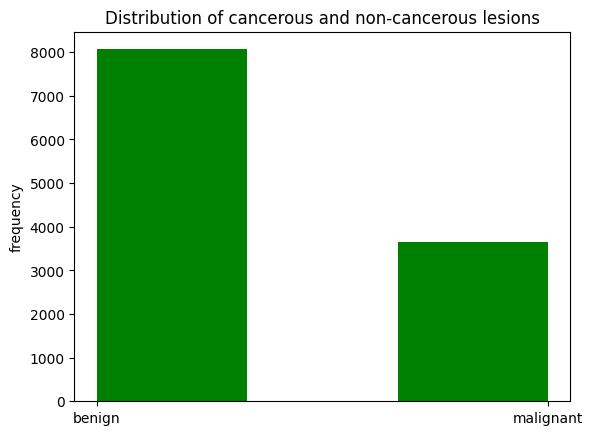

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(df['benign_malignant'], color='green', bins=3)
plt.ylabel('frequency')
plt.title('Distribution of cancerous and non-cancerous lesions')
plt.show()

# splitting images

## splitting by benign_malignant

In [ ]:
from ast import Continue
import os
import re
import shutil
import pandas as pd

image_folder = '/content/drive/MyDrive/ISIC skin cancer challenge 2024/Normal_data/images/ISIC-images'

benign_folder = '/content/drive/MyDrive/ISIC skin cancer challenge 2024/Normal_data/images/benign'
malignant_folder = '/content/drive/MyDrive/ISIC skin cancer challenge 2024/Normal_data/images/malignant'

# Regex pattern to match ISIC_<digits>.jpg
pattern = r'ISIC_\d+\.jpg'

for filename in os.listdir(image_folder):
    match = re.search(pattern, filename)
    print(f"Processing {match}")
    if match:
        isic_id = match.group().replace('.jpg', '')

        if isic_id in df['isic_id'].values:
            label = df.loc[df['isic_id'] == isic_id, 'benign_malignant'].values[0]

            if label == 'benign':
                dest_folder = benign_folder
            elif label == 'malignant':
                dest_folder = malignant_folder
            else:
                Continue

            src_path = os.path.join(image_folder, filename)
            dest_path = os.path.join(dest_folder, filename)

            shutil.move(src_path, dest_path)
            print(f"Moved {filename} to {dest_folder}")

print("Image sorting completed.")

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/ISIC skin cancer challenge 2024/Normal_data/images/ISIC-images'

In [ ]:
test_m = '/content/drive/MyDrive/ISIC skin cancer challenge 2024/Normal_data/test_images/malignant'
test_b = '/content/drive/MyDrive/ISIC skin cancer challenge 2024/Normal_data/test_images/benign'

train_m = '/content/drive/MyDrive/ISIC skin cancer challenge 2024/Normal_data/train_images/malignant'
train_b = '/content/drive/MyDrive/ISIC skin cancer challenge 2024/Normal_data/train_images/benign'

count_test_m = len([file for file in os.listdir(test_m)])
count_test_b = len([file for file in os.listdir(test_b)])
count_train_m = len([file for file in os.listdir(train_m)])
count_train_b = len([file for file in os.listdir(train_b)])

print(f"Number of images test malignant: {count_test_m}")
print(f"Number of images test benign: {count_test_b}")
print(f"Number of images train malignant: {count_train_m}")
print(f"Number of images train benign: {count_train_b}")



Number of images test malignant: 12
Number of images test benign: 12
Number of images train malignant: 3642
Number of images train benign: 8054


In [ ]:
df.columns

Index(['isic_id', 'age_approx', 'anatom_site_general', 'benign_malignant',
       'concomitant_biopsy', 'diagnosis', 'diagnosis_confirm_type',
       'melanocytic', 'sex'],
      dtype='object')

In [ ]:
df[df['diagnosis'] == 'melanoma']['benign_malignant'].unique()

['malignant']
Categories (2, object): ['benign', 'malignant']

In [ ]:
df[df['diagnosis'] == 'nevus']['benign_malignant'].unique()

['benign']
Categories (2, object): ['benign', 'malignant']

In [ ]:
df['diagnosis'].unique()

['nevus', 'melanoma', 'pigmented benign keratosis', 'dermatofibroma', 'squamous cell carcinoma', 'basal cell carcinoma', 'vascular lesion', 'actinic keratosis']
Categories (8, object): ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma',
                         'nevus', 'pigmented benign keratosis', 'squamous cell carcinoma',
                         'vascular lesion']

In [ ]:
for i, row in df.iterrows():
    print(f"PROCESSING {row['isic_id']}")

    if row['diagnosis'] in ['melanoma', 'pigmented benign keratosis', 'dermatofibroma', 'squamous cell carcinoma', 'basal cell carcinoma']:
        df.at[i, 'benign_malignant'] = 'malignant'
        print(f"ASSIGNED {row['isic_id']} TO MALIGNANT")

    elif row['diagnosis'] in ['nevus', 'vascular lesion', 'actinic keratosis']:
        df.at[i, 'benign_malignant'] = 'benign'
        print(f"ASSIGNED {row['isic_id']} TO BENIGN")

    else:
        print(f"{row['isic_id']}: Diagnosis not identified ('{row['diagnosis']}')")


Выходные данные были обрезаны до нескольких последних строк (5000).
PROCESSING ISIC_0033526
ASSIGNED ISIC_0033526 TO MALIGNANT
PROCESSING ISIC_0033527
ASSIGNED ISIC_0033527 TO BENIGN
PROCESSING ISIC_0033528
ASSIGNED ISIC_0033528 TO MALIGNANT
PROCESSING ISIC_0033529
ASSIGNED ISIC_0033529 TO MALIGNANT
PROCESSING ISIC_0033530
ASSIGNED ISIC_0033530 TO BENIGN
PROCESSING ISIC_0033531
ASSIGNED ISIC_0033531 TO MALIGNANT
PROCESSING ISIC_0033532
ASSIGNED ISIC_0033532 TO BENIGN
PROCESSING ISIC_0033533
ASSIGNED ISIC_0033533 TO MALIGNANT
PROCESSING ISIC_0033534
ASSIGNED ISIC_0033534 TO MALIGNANT
PROCESSING ISIC_0033535
ASSIGNED ISIC_0033535 TO BENIGN
PROCESSING ISIC_0033536
ASSIGNED ISIC_0033536 TO MALIGNANT
PROCESSING ISIC_0033537
ASSIGNED ISIC_0033537 TO BENIGN
PROCESSING ISIC_0033538
ASSIGNED ISIC_0033538 TO MALIGNANT
PROCESSING ISIC_0033539
ASSIGNED ISIC_0033539 TO MALIGNANT
PROCESSING ISIC_0033540
ASSIGNED ISIC_0033540 TO BENIGN
PROCESSING ISIC_0033541
ASSIGNED ISIC_0033541 TO BENIGN
PROCESSIN

In [ ]:
df['benign_malignant'].isna().value_counts() #AFTER RELABELING

,count
benign_malignant,
False,11720


In [ ]:
df['benign_malignant'].value_counts()

,count
benign_malignant,
benign,8066
malignant,3654


In [ ]:
df.to_csv('/content/drive/MyDrive/ISIC skin cancer challenge 2024/Normal_data/metadata.csv', index=False) #saved benign and malignant

##splitting into folders

In [ ]:
!pip install split-folders

import splitfolders  # or import split_folders

input_folder = '/content/drive/MyDrive/ISIC skin cancer challenge 2024/Normal_data/skin_images'

splitfolders.fixed(input_folder, output="/content/drive/MyDrive/ISIC skin cancer challenge 2024/Normal_data/skin_images_split",
                   seed=42, fixed=(3000, 100),
                   oversample=True, group_prefix=None)


Copying files: 11720 files [12:17, 15.90 files/s]
Oversampling: 2 classes [01:34, 47.06s/ classes]


# preprocessing images


https://github.com/titulacion2021/Image-Classification-ResNet/blob/main/Pre_processing.ipynb

In [ ]:
import skimage.io as io
from skimage.transform import  rescale,resize
from skimage import exposure
from skimage.util import img_as_uint,img_as_ubyte
from skimage.color import rgb2gray


import cv2
import os

import numpy as np
%matplotlib inline

### test images

In [ ]:
destination_dir1='/content/drive/MyDrive/ISIC skin cancer challenge 2024/Normal_data/test_images/benign' #Benign preprocessed images destination directory
image_list=os.listdir('/content/drive/MyDrive/ISIC skin cancer challenge 2024/Normal_data/test_images/benign_unprocessed') #Benign unprocessed images directory

for img_name in image_list:
    img=io.imread(os.path.join('/content/drive/MyDrive/ISIC skin cancer challenge 2024/Normal_data/test_images/benign_unprocessed',img_name))
    #CLAHE
    img_CLAHE  = exposure.equalize_adapthist(img)

    img_resized_8bit=img_as_ubyte(img_CLAHE)
    io.imsave(os.path.join(destination_dir1,img_name),img_resized_8bit)


In [ ]:
destination_dir1='/content/drive/MyDrive/ISIC skin cancer challenge 2024/Normal_data/test_images/malignant' #Malignant preprocessed images destination directory
image_list=os.listdir('/content/drive/MyDrive/ISIC skin cancer challenge 2024/Normal_data/test_images/malignant_unprocessed') #Malignant unprocessed images directory

for img_name in image_list:
    img=io.imread(os.path.join('/content/drive/MyDrive/ISIC skin cancer challenge 2024/Normal_data/test_images/malignant_unprocessed',img_name))
    #CLAHE
    img_CLAHE  = exposure.equalize_adapthist(img)

    img_resized_8bit=img_as_ubyte(img_CLAHE)
    io.imsave(os.path.join(destination_dir1,img_name),img_resized_8bit)

### train images

In [ ]:
destination_dir1='/content/drive/MyDrive/ISIC skin cancer challenge 2024/Normal_data/train_images/benign' #Benign preprocessed images destination directory
image_list=os.listdir('/content/drive/MyDrive/ISIC skin cancer challenge 2024/Normal_data/train_images/benign_unprocessed') #Benign unprocessed images directory

for img_name in image_list:
    img=io.imread(os.path.join('/content/drive/MyDrive/ISIC skin cancer challenge 2024/Normal_data/train_images/benign_unprocessed',img_name))
    #CLAHE
    img_CLAHE  = exposure.equalize_adapthist(img)

    img_resized_8bit=img_as_ubyte(img_CLAHE)
    io.imsave(os.path.join(destination_dir1,img_name),img_resized_8bit)

In [ ]:
destination_dir1='/content/drive/MyDrive/ISIC skin cancer challenge 2024/Normal_data/train_images/malignant' #Malignant preprocessed images destination directory
image_list=os.listdir('/content/drive/MyDrive/ISIC skin cancer challenge 2024/Normal_data/train_images/malignant_unprocessed') #Malignant unprocessed images directory

for img_name in image_list:
    img=io.imread(os.path.join('/content/drive/MyDrive/ISIC skin cancer challenge 2024/Normal_data/train_images/malignant_unprocessed',img_name))
    #CLAHE
    img_CLAHE  = exposure.equalize_adapthist(img)

    img_resized_8bit=img_as_ubyte(img_CLAHE)
    io.imsave(os.path.join(destination_dir1,img_name),img_resized_8bit)

#test dataset metadata

In [ ]:
import pandas as pd
import skimage.io as io
from skimage.transform import  rescale,resize
from skimage import exposure
from skimage.util import img_as_uint,img_as_ubyte
from skimage.color import rgb2gray


import cv2
import os

malignants=os.listdir('/content/drive/MyDrive/ISIC skin cancer challenge 2024/Normal_data/skin_images_split/test/malignant')
benigns=os.listdir('/content/drive/MyDrive/ISIC skin cancer challenge 2024/Normal_data/skin_images_split/test/benign')

img_id = []
benign_malignant = []

for img_name in malignants:
  img_id.append(img_name)
  benign_malignant.append('malignant')

for img_name in benigns:
  img_id.append(img_name)
  benign_malignant.append('benign')

df = pd.DataFrame(list(zip(img_id, benign_malignant)),
               columns =['isic_id', 'benign_malignant'])

df.to_csv('/content/drive/MyDrive/ISIC skin cancer challenge 2024/Normal_data/metadata_test.csv', index=False)

In [ ]:
 lol = pd.read_csv("/content/drive/MyDrive/ISIC skin cancer challenge 2024/Normal_data/metadata_test.csv")

In [ ]:
lol.head(5
         )

,isic_id,benign_malignant
0,ISIC_0032424.jpg,malignant
1,ISIC_0032751.jpg,malignant
2,ISIC_0027455.jpg,malignant
3,ISIC_0028148.jpg,malignant
4,ISIC_0035853.jpg,malignant


In [ ]:
df['benign_malignant_binary'] = df['benign_malignant'].apply(lambda x: 1 if x == 'malignant' else 0)

In [ ]:
df.head()

,isic_id,benign_malignant,benign_malignant_binary
0,ISIC_0032424.jpg,malignant,1
1,ISIC_0032751.jpg,malignant,1
2,ISIC_0027455.jpg,malignant,1
3,ISIC_0028148.jpg,malignant,1
4,ISIC_0035853.jpg,malignant,1


In [ ]:
df.tail(
)

,isic_id,benign_malignant,benign_malignant_binary
195,ISIC_0027494.jpg,benign,0
196,ISIC_0028638.jpg,benign,0
197,ISIC_0031617.jpg,benign,0
198,ISIC_0028433.jpg,benign,0
199,ISIC_0030098.jpg,benign,0


In [ ]:
df.to_csv('/content/drive/MyDrive/ISIC skin cancer challenge 2024/Normal_data/metadata_test.csv', index=False)